# Finding the dimensionality of Dataset
First we need to import some libraries and configure plotting style to begin the analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
import pandas
import sys
sys.path.append('../src/')
from diffusion_maps_tools import *
# Matplotlib setup
plt.style.use('seaborn-white')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=10)
plt.rc('font', family='serif')

In [2]:
filename = 'input.xlsx'
input_array = np.array(pandas.read_excel(filename, skiprows=2).iloc[:, 1:])
print('The shape of input array is {}'.format(input_array.shape))

The shape of input array is (999, 7)


In [3]:
data_dmap = input_array[:900,:6]
print('The shape of input array is {}'.format(data_dmap.shape))
kon1 =data_dmap[:,0] 
kon2 =data_dmap[:,1]
koff1=data_dmap[:,2]
koff2=data_dmap[:,3]
kcat1=data_dmap[:,4]
kcat2=data_dmap[:,5]

The shape of input array is (900, 6)


In [4]:
#minmax_scaler = MinMaxScaler(feature_range=(0,1)).fit(data_dmap)
#input_scaled = minmax_scaler.transform(data_dmap)
input_scaled = data_dmap

In [5]:
DiffMaps = diffusion_maps_tools()
num_eigenpairs = 20
epsilon = 1000
distance = DiffMaps.distance(points = input_scaled)
print(np.amax(distance))
kernel = DiffMaps.kernel(metric = distance, epsilon=epsilon*2)
kernel = DiffMaps.ker_normalize(kernel, alpha=1.0)
eigval, phi = DiffMaps.eigensolver(matrix = kernel,
                                   num_eigenpairs = num_eigenpairs)
print('    Eigenvalues are = {}'.format(eigval.real))

  > Dataset: 900 points in 6 dimensions
  > Compute distances with pdist
  --> Distance matrix is 100.0000% dense.
131.46067316774779
  > Compute Kernel
  > Compute Normalized Kernel with alpha=1.000000
  > Compute First 20 Eigenvectors
    Eigenvalues are = [1.         0.72364202 0.50082032 0.36378442 0.25535397 0.17320158
 0.14227633 0.13739078 0.10083667 0.07100992 0.06006294 0.04654414
 0.03812834 0.03097624 0.02781296 0.02608159 0.01701364 0.01657616
 0.01433218 0.01170786]


<IPython.core.display.Javascript object>


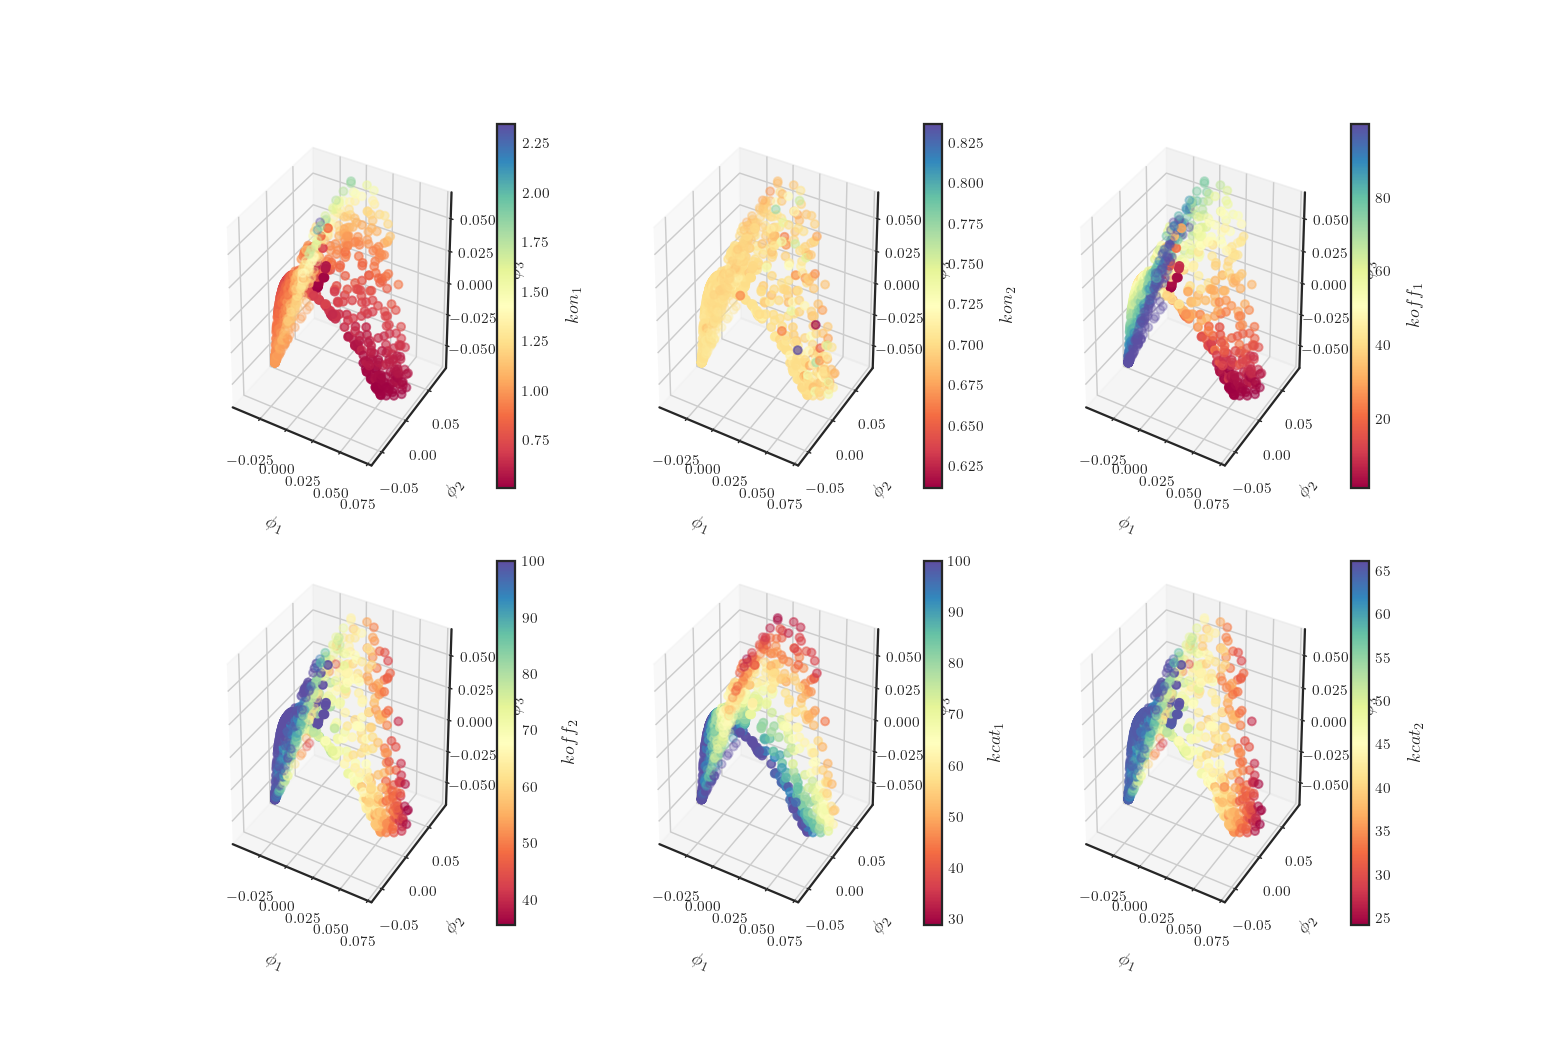

In [6]:
%matplotlib notebook
%matplotlib notebook
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(231, projection='3d')
p=ax1.scatter(phi[:,1], phi[:,2], phi[:,3],c=kon1, cmap='Spectral', rasterized=True)
ax1.set_xlabel(r'$\phi_1$')
ax1.set_ylabel(r'$\phi_2$')
ax1.set_zlabel(r'$\phi_3$')
cbar = plt.colorbar(p, ax=ax1)
cbar.set_label(r'$kon_1$')

ax2 = fig.add_subplot(232, projection='3d')
p=ax2.scatter(phi[:,1], phi[:,2], phi[:,3],c=kon2, cmap='Spectral', rasterized=True)
ax2.set_xlabel(r'$\phi_1$')
ax2.set_ylabel(r'$\phi_2$')
ax2.set_zlabel(r'$\phi_3$')
cbar = plt.colorbar(p, ax=ax2)
cbar.set_label(r'$kon_2$')

ax3 = fig.add_subplot(233, projection='3d')
p=ax3.scatter(phi[:,1], phi[:,2], phi[:,3],c=koff1, cmap='Spectral', rasterized=True)
ax3.set_xlabel(r'$\phi_1$')
ax3.set_ylabel(r'$\phi_2$')
ax3.set_zlabel(r'$\phi_3$')
cbar = plt.colorbar(p, ax=ax3)
cbar.set_label(r'$koff_1$')

ax4 = fig.add_subplot(234, projection='3d')
p=ax4.scatter(phi[:,1], phi[:,2], phi[:,3],c=koff2, cmap='Spectral', rasterized=True)
ax4.set_xlabel(r'$\phi_1$')
ax4.set_ylabel(r'$\phi_2$')
ax4.set_zlabel(r'$\phi_3$')
cbar = plt.colorbar(p, ax=ax4)
cbar.set_label(r'$koff_2$')

ax5 = fig.add_subplot(235, projection='3d')
p=ax5.scatter(phi[:,1], phi[:,2], phi[:,3],c=kcat1, cmap='Spectral', rasterized=True)
ax5.set_xlabel(r'$\phi_1$')
ax5.set_ylabel(r'$\phi_2$')
ax5.set_zlabel(r'$\phi_3$')
cbar = plt.colorbar(p, ax=ax5)
cbar.set_label(r'$kcat_1$')

ax6 = fig.add_subplot(236, projection='3d')
p=ax6.scatter(phi[:,1], phi[:,2], phi[:,3], c=kcat2, cmap='Spectral', rasterized=True)
ax6.set_xlabel(r'$\phi_1$')
ax6.set_ylabel(r'$\phi_2$')
ax6.set_zlabel(r'$\phi_3$')
cbar = plt.colorbar(p, ax=ax6)
cbar.set_label(r'$kcat_2$')

#plt.tight_layout()
# plt.savefig('phi1_phi2_all.pdf')

In [7]:
psi1 = (kcat1*kon1)/(koff1+kcat1)
psi2 = (kcat2*kon2)/(koff2+kcat2)
psi3 = (kcat2)/(kcat2+koff2)

<IPython.core.display.Javascript object>


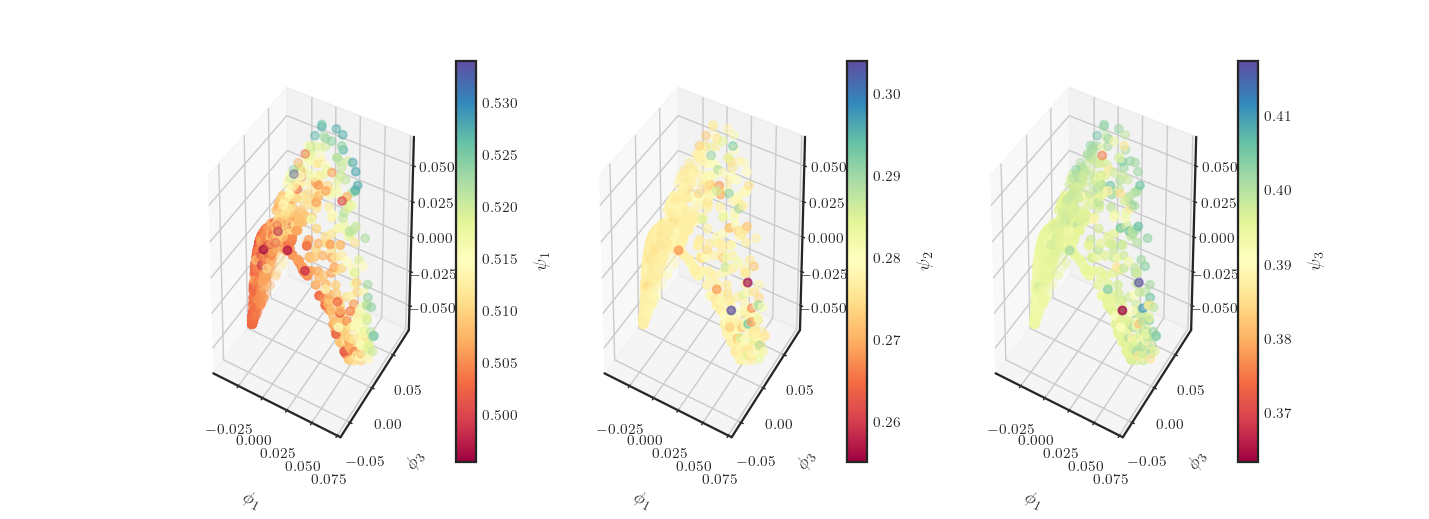

In [12]:
fig = plt.figure(figsize=(11,4))

ax1 = plt.subplot(131, projection='3d')
p=ax1.scatter(phi[:,1], phi[:,2], phi[:,3], c=psi1, cmap='Spectral', rasterized=True)
ax1.set_xlabel(r'$\phi_1$')
ax1.set_ylabel(r'$\phi_2$')
ax1.set_ylabel(r'$\phi_3$')
cbar = plt.colorbar(p, ax=ax1)
cbar.set_label(r'$\psi_1$')


ax2 = plt.subplot(132, projection='3d')
p=ax2.scatter(phi[:,1], phi[:,2], phi[:,3], c=psi2, cmap='Spectral', rasterized=True)
ax2.set_xlabel(r'$\phi_1$')
ax2.set_ylabel(r'$\phi_2$')
ax2.set_ylabel(r'$\phi_3$')
cbar = plt.colorbar(p, ax=ax2)
cbar.set_label(r'$\psi_2$')

ax3 = plt.subplot(133, projection='3d')
p=ax3.scatter(phi[:,1], phi[:,2], phi[:,3], c=psi3, cmap='Spectral', rasterized=True)
ax3.set_xlabel(r'$\phi_1$')
ax3.set_ylabel(r'$\phi_2$')
ax3.set_ylabel(r'$\phi_3$')
cbar = plt.colorbar(p, ax=ax3)
cbar.set_label(r'$\psi_3$')
plt.savefig('stas.pdf')
#plt.tight_layout()

<IPython.core.display.Javascript object>


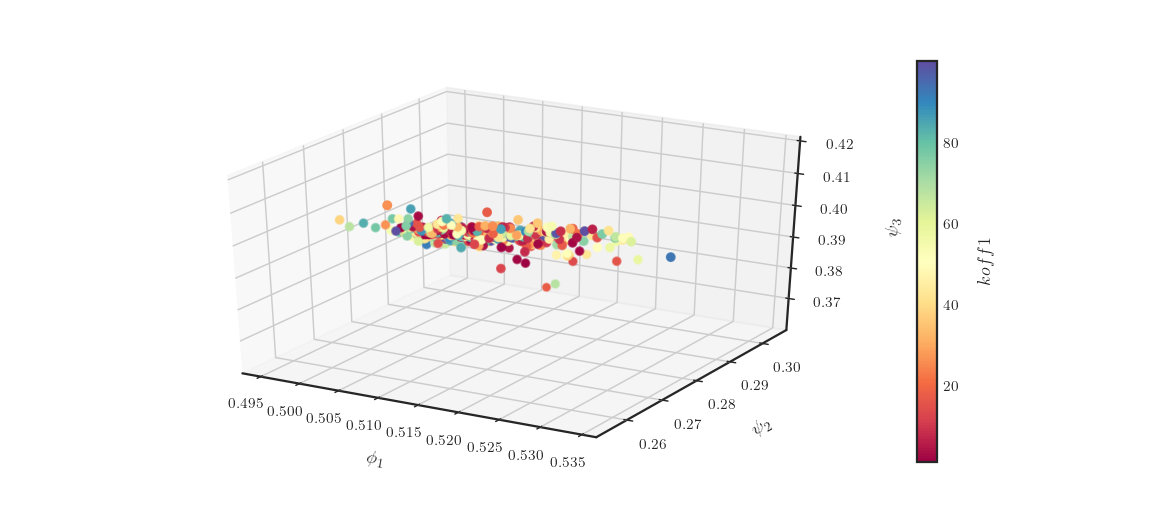

In [9]:
fig = plt.figure(figsize=(9,4))

ax1 = plt.subplot(111, projection='3d')
p=ax1.scatter(psi1, psi2, psi3, c=koff1, cmap='Spectral', rasterized=True)
ax1.set_xlabel(r'$\phi_1$')
ax1.set_ylabel(r'$\psi_2$')
ax1.set_zlabel(r'$\psi_3$')
cbar = plt.colorbar(p, ax=ax1)
cbar.set_label(r'$koff1$')
